## Importing the required libraries:

In [2]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#printing the versions of packages
print(np.__version__)#prints the version of numpy
print(pd.__version__)#prints the version of pandas
print(sns.__version__)#prints the version of sns
import sklearn
print(sklearn.__version__)#prints the version of sklearn
import matplotlib
print(matplotlib.__version__)#prints the version of matplotlib


1.18.5
1.0.5
0.10.1
0.22.2.post1
3.2.2


## Importing the dataset:

In [4]:
#Reading the data
df = pd.read_csv("/content/drive/My Drive/TelcoCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape#to show the number of rows and columns

(7043, 21)

# **Exploratory Data Analysis:**

In [6]:
df.isna().sum().sum() #missing values in the data set

0

In [7]:
df.dtypes#datatypes of columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()#statistical analysis of dataset

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#changing the values of target variable from 'yes' to 1 and 'no' to 0
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

## Visualizing the data to detect relationships between the target variable and other columns:

Text(0.5, 1.0, 'Visualization of Churn')

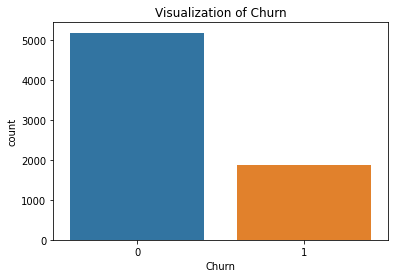

In [10]:
sns.countplot(df['Churn']).set_title("Visualization of Churn")#visualizing the target variable

Text(0.5, 1.0, 'Visualization of PaperlessBilling')

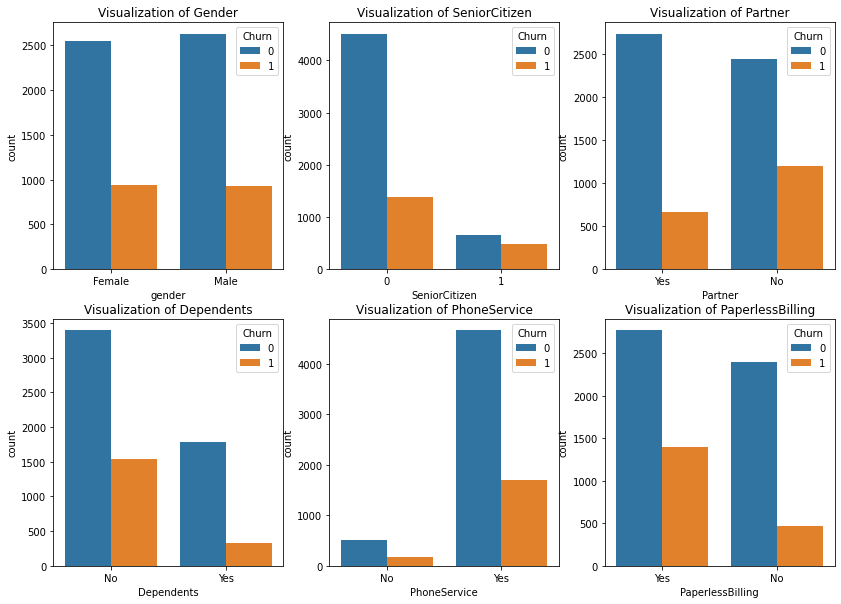

In [11]:
#visualizing other columns according to the target variable
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

sns.countplot("gender",hue='Churn', data=df, ax=axes[0,0]).set_title("Visualization of Gender")
sns.countplot("SeniorCitizen",hue='Churn', data=df, ax=axes[0,1]).set_title("Visualization of SeniorCitizen")
sns.countplot("Partner",hue='Churn', data=df, ax=axes[0,2]).set_title("Visualization of Partner")
sns.countplot("Dependents",hue='Churn', data=df, ax=axes[1,0]).set_title("Visualization of Dependents")
sns.countplot("PhoneService",hue='Churn', data=df, ax=axes[1,1]).set_title("Visualization of PhoneService")
sns.countplot("PaperlessBilling",hue='Churn', data=df, ax=axes[1,2]).set_title("Visualization of PaperlessBilling")

Average churn rate for males and females are almost same so gender columns does not bring any use to the prediction and can be dropped like wise lets check for other columns too

Text(0.5, 1.0, 'Visualization of InternetSevice')

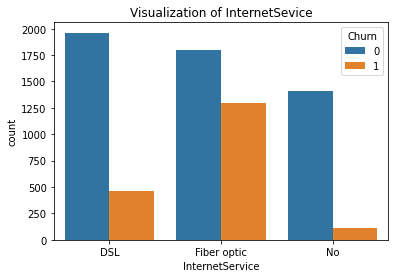

In [12]:
#Lets visualize the churn count for internet service
sns.countplot(x='InternetService',hue='Churn',data=df).set_title("Visualization of InternetSevice")

We can see that the Internet Service column is definitely important in predicting the churn rate. customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic

Text(0.5, 1.0, 'Visualization of TechSupport')

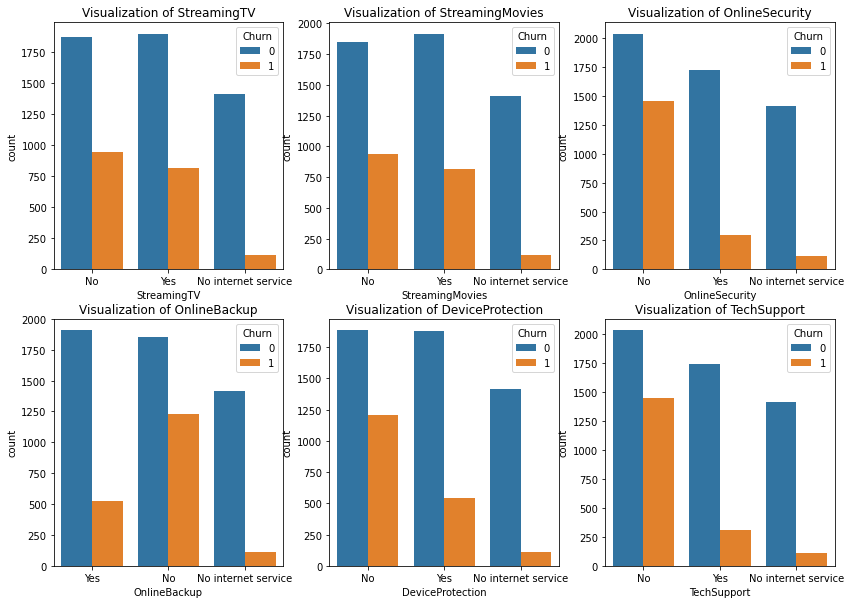

In [13]:
#visualizing the internet service related features
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
sns.countplot("StreamingTV",hue='Churn', data=df, ax=axes[0,0]).set_title("Visualization of StreamingTV")
sns.countplot("StreamingMovies",hue='Churn', data=df, ax=axes[0,1]).set_title("Visualization of StreamingMovies")
sns.countplot("OnlineSecurity",hue='Churn', data=df, ax=axes[0,2]).set_title("Visualization of OnlineSecurity")
sns.countplot("OnlineBackup",hue='Churn', data=df, ax=axes[1,0]).set_title("Visualization of OnlineBackup")
sns.countplot("DeviceProtection",hue='Churn', data=df, ax=axes[1,1]).set_title("Visualization of DeviceProtection")
sns.countplot("TechSupport",hue='Churn', data=df, ax=axes[1,2]).set_title("Visualization of TechSupport")

All the internet service related features seem to have different churn rates for their classes

Text(0.5, 1.0, 'Visualization of PaymentMethod')

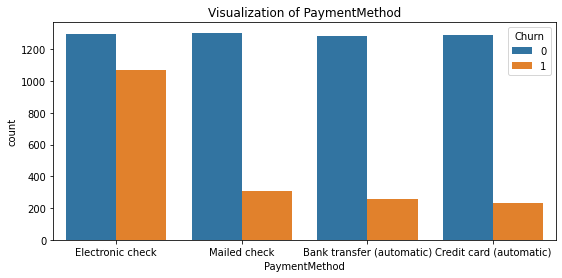

In [14]:
plt.figure(figsize=(9,4))
sns.countplot("PaymentMethod",hue='Churn',data=df).set_title("Visualization of PaymentMethod")

Text(0.5, 1.0, 'Visualization of MonthlyCharges')

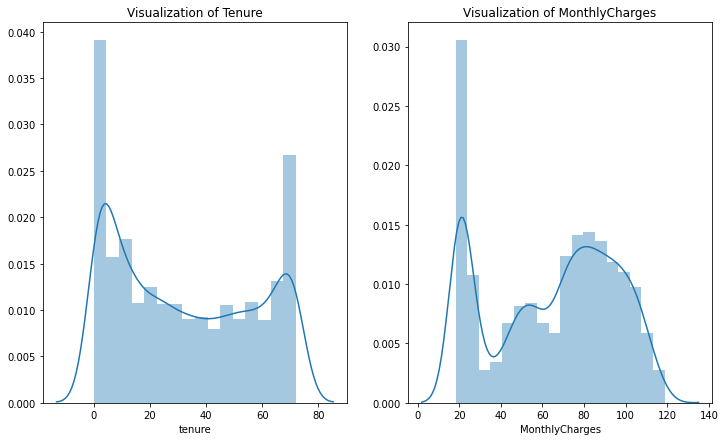

In [15]:
#visualizing the continuos features
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0]).set_title("Visualization of Tenure")
sns.distplot(df["MonthlyCharges"], ax=axes[1]).set_title("Visualization of MonthlyCharges")

Contract and Total Charges columns can be dropped as we use tenure and MonthlyCharges columns

# **Data Selection:**

### After exploring the variables customerID,Gender,PhoneService,Contract,TotalCharges columns can be dropped since they add little or no use for prediction

In [16]:
#dropping the uneccessary variables
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [17]:
df.head()#showing the first 5 rows after dropping

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


# **Data Pre-processing:**

## Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model:

In [18]:
#encoding the categorical features
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

## We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model:

In [19]:
#scaling the continuos feautures using minmax scaler
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

In [20]:
X['tenure'] = a
X['MonthlyCharges'] = b

In [21]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# **Upsampling should be done because the target variable has imbalanced distribution which affects the machine learning model**

Text(0.5, 1.0, 'Class Distribution Before Resampling')

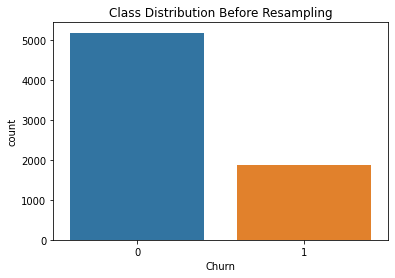

In [22]:
#visualisation of target variable before resampling
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [23]:
from sklearn.utils import resample #importing the required package

In [24]:
#seperating the distribution into x_no for churn=0 and x=yes for churn=1 
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [25]:
#printing the count of class distribution
print(len(X_no),len(X_yes))

5174 1869


In [26]:
X_yes_upsampled = resample(X_yes, replace=True,n_samples=5174, random_state=42)
print(len(X_yes_upsampled))

5174


In [27]:
#creating the varibale x_upsampled which has the same count as x_no
X_upsampled = pd.concat([X_no,X_yes_upsampled])

Text(0.5, 1.0, 'Class Distribution After Resampling')

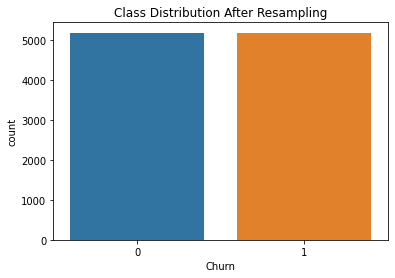

In [28]:
#visualizing the target variable after resampling
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

# **Train-Test-Split:**

In [29]:
#splitting the data
x = X_upsampled.drop(['Churn'], axis=1) #features
y = X_upsampled['Churn'] #target

In [30]:
#splitting the data into test and train
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

## **Models Creation:**

In [31]:
train_accu=np.zeros(3) #to store train accuracies
test_accu=np.zeros(3) #to store test accuracies

## **Logistic regression:**

In [32]:
from sklearn.linear_model import LogisticRegression #importing the required package
lr = LogisticRegression() #creating an object for the model
lr.fit(x_train,y_train) #training the model
lr_train_pred=lr.predict(x_train) #predicting on train data
lr_test_pred=lr.predict(x_test) #predicting on test data
#Checking the metrics
train_accu[0]=accuracy_score(y_train,lr_train_pred)
test_accu[0]=accuracy_score(y_test,lr_test_pred)
print("LogisticRegression Train Accuracy: ",train_accu[0])
print("LogisticRegression Test Accuracy: ",test_accu[0])

LogisticRegression Train Accuracy:  0.7553756946122252
LogisticRegression Test Accuracy:  0.7603864734299517


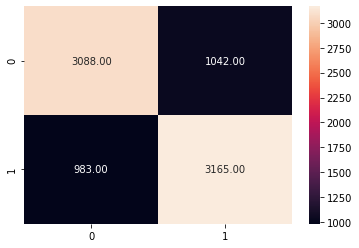

In [33]:
#visualization of the confusion matrix for train data
sns.heatmap(confusion_matrix(y_train,lr_train_pred),annot=True,fmt='.2f')

In [34]:
#printing the classification report for train data
print(classification_report(y_train,lr_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      4130
           1       0.75      0.76      0.76      4148

    accuracy                           0.76      8278
   macro avg       0.76      0.76      0.76      8278
weighted avg       0.76      0.76      0.76      8278



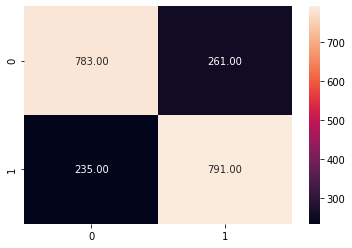

In [35]:
#visualization of the confusion matrix for test data
sns.heatmap(confusion_matrix(y_test,lr_test_pred),annot=True,fmt='.2f')

In [36]:
#printing the classification report for test data
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1044
           1       0.75      0.77      0.76      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



## **K-Nearest Neighbors Classifier:**

In [37]:
from sklearn.neighbors import KNeighborsClassifier#importing the required package
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')#creating an object for the model
knn.fit(x_train,y_train) #training the model
knn_train_pred=knn.predict(x_train) #predicting on train data
knn_test_pred=knn.predict(x_test) #predicting on test data
#Checking the metrics
train_accu[1]=accuracy_score(y_train,knn_train_pred)
test_accu[1]=accuracy_score(y_test,knn_test_pred)
print("KNN Train Accuracy: ",train_accu[1])
print("KNN Test Accuracy: ",test_accu[1])

KNN Train Accuracy:  0.7749456390432472
KNN Test Accuracy:  0.7584541062801933


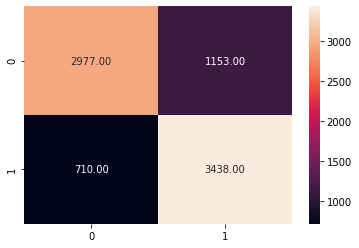

In [38]:
#visualization of the confusion matrix for train data
sns.heatmap(confusion_matrix(y_train,knn_train_pred),annot=True,fmt='.2f')

In [39]:
#printing classification report for train data
print(classification_report(y_train,knn_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      4130
           1       0.75      0.83      0.79      4148

    accuracy                           0.77      8278
   macro avg       0.78      0.77      0.77      8278
weighted avg       0.78      0.77      0.77      8278



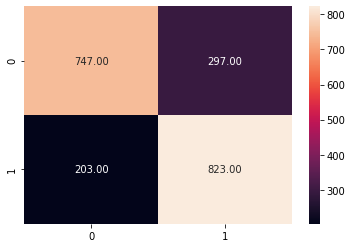

In [40]:
#visualization of the confusion matrix for test data
sns.heatmap(confusion_matrix(y_test,knn_test_pred),annot=True,fmt='.2f')

In [41]:
#printing classification report for test data
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1044
           1       0.73      0.80      0.77      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



## **Random Forest Classifier:**

In [42]:
from sklearn.ensemble import RandomForestClassifier#importing the required package
clf = RandomForestClassifier()#creating an object for the model
clf.fit(x_train, y_train) #training the model
clf_train_pred=clf.predict(x_train)#predicting on train data
clf_test_pred=clf.predict(x_test)#predicitng on test data
#Checking the metrics
train_accu[2]=accuracy_score(y_train,clf_train_pred)
test_accu[2]=accuracy_score(y_test,clf_test_pred)
print("RandomForestClassifier Train Accuracy: ",train_accu[2])
print("RandomForestClassifier Test Accuracy: ",test_accu[2])

RandomForestClassifier Train Accuracy:  0.996859144720947
RandomForestClassifier Test Accuracy:  0.9082125603864735


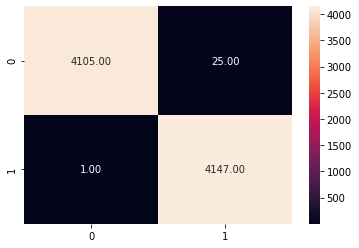

In [43]:
#visualization of the confusion matrix for train data
sns.heatmap(confusion_matrix(y_train,clf_train_pred),annot=True,fmt='.2f')

In [44]:
#printing classification report for train data
print(classification_report(y_train,clf_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4130
           1       0.99      1.00      1.00      4148

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



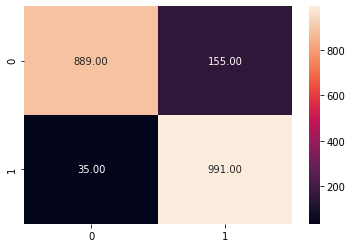

In [45]:
#visualization of the confusion matrix for test data
sns.heatmap(confusion_matrix(y_test,clf_test_pred),annot=True,fmt='.2f')

In [46]:
#printing classification report for test data
print(classification_report(y_test,clf_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1044
           1       0.86      0.97      0.91      1026

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070



# **Comparing the Accuracies of all the three models:**

In [47]:
#defining labels and printing accuracies
labels=['Logistic Regression','KNN','Random Forest']
print("Train accuracies: ",train_accu)
print("Test Accuracies: ",test_accu)

Train accuracies:  [0.75537569 0.77494564 0.99685914]
Test Accuracies:  [0.76038647 0.75845411 0.90821256]


Accuracy Comparision for TRAIN data for all the models:




Text(0.5, 1.0, 'Train Accuracy of various algorithms')

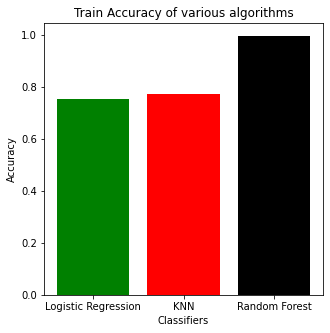

In [48]:
#visualizing the train accuracies of all the models
print("Accuracy Comparision for TRAIN data for all the models:\n\n")
plt.subplots(figsize=(5,5))
plt.bar(labels,train_accu,color=['green','red','black'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train Accuracy of various algorithms')

Accuracy Comparision for TEST data for all the models:




Text(0.5, 1.0, 'Test Accuracy of various algorithms')

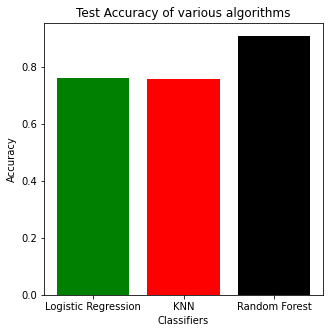

In [49]:
#visualizing the test accuracies of all the models
print("Accuracy Comparision for TEST data for all the models:\n\n")
plt.subplots(figsize=(5,5))
plt.bar(labels,test_accu,color=['green','red','black'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of various algorithms')

# **As we can see out of all the three algorithms the maximum accuracy is obtained by using RandomForest classifier.Hence by this project we can conclude that RandomForest algorithm works best in predicting Customer Churn**